Solución Del Laboratorio 4

PARTE 1


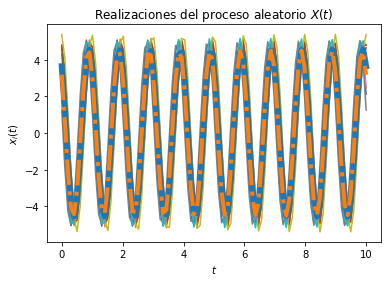

In [1]:
#--------------------------------------------------------------------------
# Práctica E13, Problema # 4
# PARTE A
# Los parámetros T, t_final y N son elegidos arbitrariamente

# Importar librerías
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias C, Z(Theta) y O(Omega)
vaC = stats.norm(5, np.sqrt(0.2)) 
# vaO = stats.uniform(np.pi*2*(59.1), np.pi*2*(60.1))   
vaZ = stats.uniform(0, np.pi/2)

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C, Z y O independientes)
for i in range(N):
	C = vaC.rvs()
	Z = vaZ.rvs()
	x_t = C * np.cos(2*np.pi*t + Z)   # Se utiliza la constante 2pi para omega
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi * (np.cos(2*np.pi*t)-np.sin(2*np.pi*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

PARTE 2

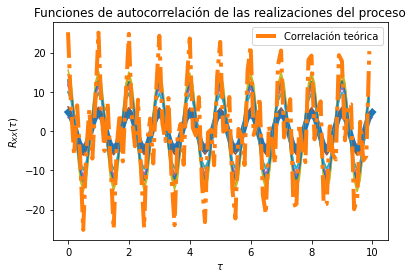

In [5]:
# --------------------------------------------------------------------------
# Práctica E13, Problema # 4
# PARTE B
# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias C, Z(Theta) y O(Omega)
variable_C = stats.norm(5, np.sqrt(0.2))  

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (C)
for i in range(N):
	C = variable_C.rvs()
	x_t = C * np.cos(np.pi*2*t + np.pi*2)  # Se utiliza la constante 2*pi 
																				 # para Z y para Omega 
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
# E = 25.2*np.cos(np.pi*t+np.pi)*np.cos(np.pi*(t)+np.pi)
# plt.plot(t, E, '-.', lw=4)

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación indicado en el problema
Rxx = 25.2*np.cos(np.pi*2*t+np.pi*2)*np.cos(np.pi*2*(t+ taus)+np.pi*2)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()